In [13]:
import numpy as np
import matplotlib.pyplot as plt

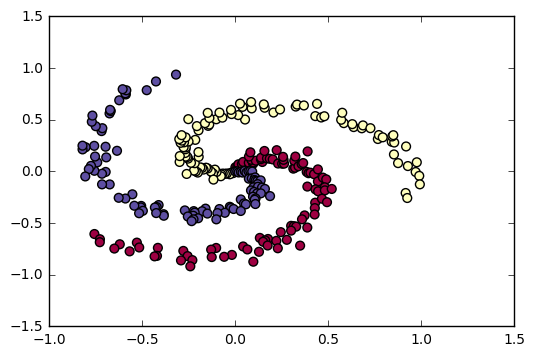

In [14]:
N = 100
D = 2
K = 3

X = np.zeros((N*K, D))
y = np.zeros(N*K, dtype='uint8')

for j in range(K):
    ix = list(range(N*j,N*(j+1)))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [16]:
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

scores = np.dot(X, W) + b

exp_scores = np.exp(scores)

probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [28]:
num_examples = X.shape[0]

correct_probs = -np.log(probs[range(num_examples), y])

In [31]:
reg = 0.1
data_loss = np.sum(correct_probs) / num_examples
reg_loss = 0.5 * reg * np.sum(W * W)
loss = data_loss + reg_loss

In [47]:
num_examples = X.shape[0]
reg = 0.0
step_size = 0.1
epochs = 2000

for i in range(epochs):
    scores = np.dot(X, W) + b
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    correct_probs = -np.log(probs[range(num_examples), y])

    data_loss = np.sum(correct_probs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W)
    loss = data_loss + reg_loss
    
    if i % 100 == 0:
        print("iteration: {}, loss: {}".format(i, data_loss))

    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
    dW += reg * W

    W += -step_size * dW
    b += -step_size * db


iteration: 0, loss: 2.9134768356773133
iteration: 100, loss: 1.5861686392089058
iteration: 200, loss: 1.2000129317484827
iteration: 300, loss: 1.1186535354898242
iteration: 400, loss: 1.0910396129551945
iteration: 500, loss: 1.0718564282868397
iteration: 600, loss: 1.054515580403514
iteration: 700, loss: 1.0380228758059198
iteration: 800, loss: 1.0221790683798566
iteration: 900, loss: 1.006912666098443
iteration: 1000, loss: 0.9921818765436747
iteration: 1100, loss: 0.9779578345301922
iteration: 1200, loss: 0.9642200938550167
iteration: 1300, loss: 0.9509543354955385
iteration: 1400, loss: 0.9381507720810767
iteration: 1500, loss: 0.9258029592546442
iteration: 1600, loss: 0.9139069057633757
iteration: 1700, loss: 0.9024604088686317
iteration: 1800, loss: 0.8914625563017182
iteration: 1900, loss: 0.8809133471162145


In [45]:
scores = np.dot(X, W) + b
predicted = np.argmax(scores, axis=1)
print(np.mean(predicted == y))

0.506666666667


In [42]:
W

array([[ 1.36810679,  1.16482458, -2.53293137],
       [-2.82943646,  3.20500774, -0.37557128]])

### Neural Network

In [58]:
h = 100
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))
epochs = 10000
reg = 1e-3
step_size = 1e-0

num_examples = X.shape[0]

for i in range(epochs):

    hidden_layer = np.maximum(np.dot(X, W) + b, 0)
    scores = np.dot(hidden_layer, W2) + b2

    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    correct_probs = -np.log(probs[range(num_examples), y])

    data_loss = np.sum(correct_probs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W ** 2) + 0.5 * reg * np.sum(W2 ** 2)
    loss = data_loss + reg_loss

    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)

    dhidden = np.dot(dscores, W2.T)
    dhidden[hidden_layer <= 0] = 0

    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    dW += reg * W
    dW2 += reg * W2

    W += -step_size * dW
    W2 += -step_size * dW2
    b += -step_size * db
    b2 += -step_size * db2
    
    if i % 100 == 0:
        print("Loss : {}, iteration: {}".format(data_loss, i))

Loss : 1.098643205520102, iteration: 0
Loss : 0.6862191775665503, iteration: 100
Loss : 0.6921098801484706, iteration: 200
Loss : 0.5889740713385924, iteration: 300
Loss : 0.35978481155705516, iteration: 400
Loss : 0.2637952327109832, iteration: 500
Loss : 0.23424537629255188, iteration: 600
Loss : 0.2161780394232467, iteration: 700
Loss : 0.20189135499389146, iteration: 800
Loss : 0.19258769112874713, iteration: 900
Loss : 0.1870424523363678, iteration: 1000
Loss : 0.17954695110299346, iteration: 1100
Loss : 0.17619097922902627, iteration: 1200
Loss : 0.16952123129913954, iteration: 1300
Loss : 0.1659326156091177, iteration: 1400
Loss : 0.16146479694554688, iteration: 1500
Loss : 0.15815519267528877, iteration: 1600
Loss : 0.155319396948206, iteration: 1700
Loss : 0.15129755066954953, iteration: 1800
Loss : 0.14783557708694656, iteration: 1900
Loss : 0.14621957330963387, iteration: 2000
Loss : 0.1419950639466243, iteration: 2100
Loss : 0.1391683171294516, iteration: 2200
Loss : 0.1366

In [59]:
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.97
